In [34]:
# import those beauties
import pandas as pd
import geopandas as gpd
import geopy
from geopandas.tools import geocode
import contextily as ctx
from geopy.geocoders import Nominatim
import csv
import shapely
import matplotlib.pyplot as plt
import matplotlib.colors 
import numpy as np
import math
import seaborn as sns
from geopandas import GeoDataFrame
from shapely.geometry import Polygon, Point
import pylab as pl


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
%matplotlib inline


# import and merge datasets

In [35]:
real_raw = pd.read_csv('/Users/trevorban/Desktop/ames_project/Machine Learning Project Proposal/data/Ames_Real_Estate_Data.csv')
train_raw = pd.read_csv('/Users/trevorban/Desktop/ames-housing-prediction/Data_Master/TRAIN.csv')
test_raw = pd.read_csv('/Users/trevorban/Desktop/ames-housing-prediction/Data_Master/TEST.csv')

In [36]:
test_raw.shape

(476, 173)

In [37]:
train_raw.shape

(1902, 173)

In [38]:
train_raw.head()

Unnamed: 0   MapRefNo Neighborhood  GrLivArea  LotArea  LotShape  \
0        1736  923250210      Mitchel        988    21750         0   
1        1355  534177210       NWAmes       1242     9600         0   
2           6  528228540      Blmngtn       1246     3710         0   
3         900  534275010        NAmes       1050    10659         1   
4        1677  907290170      CollgCr        848     4435         0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0          2            5            5       1954          1954         0.0   
1          1            7            6       1973          1973       320.0   
2          1            7            5       2007          2008        20.0   
3          1            5            6       1961          1961         0.0   
4          1            6            5       2003          2003       170.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         3         3             1             1   
1          3          3         3         3             1             5   
2          4          3         4         3             4             1   
3          3          3         3         3             1             3   
4          4          3         4         3             3             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         0.0             1         0.0      988.0        988.0          5   
1       916.0             1         0.0      326.0       1242.0          2   
2         0.0             1         0.0     1146.0       1146.0          5   
3       915.0             1         0.0      135.0       1050.0          3   
4       672.0             1         0.0      176.0        848.0          5   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1       988         0             0           0.0           0.0   
1           1      1242         0             0           0.0           0.0   
2           1      1246         0             0           0.0           0.0   
3           1      1050         0             0           1.0           0.0   
4           1       848         0             0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            3             4   
1         1         1             3             1            3             6   
2         2         0             2             1            4             5   
3         1         0             3             1            3             6   
4         1         0             1             1            4             4   

   Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           8           0       1954.0             2         2.0       520.0   
1           8           1       1973.0             1         2.0       528.0   
2           8           1       2007.0             3         2.0       428.0   
3           8           0       1961.0             1         1.0       368.0   
4           8           0       2003.0             3         2.0       420.0   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0            0              0          0   
1           3           3           0            0              0          0   
2           3           3         100           24              0          0   
3           3           3           0          319              0          0   
4           3           3         140            0              0          0   

   ScreenPorch  PoolArea  MiscVal  MSSubClass_other  \
0            0         0        0                 0   
1            0         0        0                 0   
2            0         0        0                 0   
3            0         0        0          

In [39]:
train_df = train_raw.copy()
test_df = test_raw.copy()
real = real_raw.copy()

In [40]:
train_df.head()

Unnamed: 0   MapRefNo Neighborhood  GrLivArea  LotArea  LotShape  \
0        1736  923250210      Mitchel        988    21750         0   
1        1355  534177210       NWAmes       1242     9600         0   
2           6  528228540      Blmngtn       1246     3710         0   
3         900  534275010        NAmes       1050    10659         1   
4        1677  907290170      CollgCr        848     4435         0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0          2            5            5       1954          1954         0.0   
1          1            7            6       1973          1973       320.0   
2          1            7            5       2007          2008        20.0   
3          1            5            6       1961          1961         0.0   
4          1            6            5       2003          2003       170.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         3         3             1             1   
1          3          3         3         3             1             5   
2          4          3         4         3             4             1   
3          3          3         3         3             1             3   
4          4          3         4         3             3             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         0.0             1         0.0      988.0        988.0          5   
1       916.0             1         0.0      326.0       1242.0          2   
2         0.0             1         0.0     1146.0       1146.0          5   
3       915.0             1         0.0      135.0       1050.0          3   
4       672.0             1         0.0      176.0        848.0          5   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1       988         0             0           0.0           0.0   
1           1      1242         0             0           0.0           0.0   
2           1      1246         0             0           0.0           0.0   
3           1      1050         0             0           1.0           0.0   
4           1       848         0             0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            3             4   
1         1         1             3             1            3             6   
2         2         0             2             1            4             5   
3         1         0             3             1            3             6   
4         1         0             1             1            4             4   

   Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           8           0       1954.0             2         2.0       520.0   
1           8           1       1973.0             1         2.0       528.0   
2           8           1       2007.0             3         2.0       428.0   
3           8           0       1961.0             1         1.0       368.0   
4           8           0       2003.0             3         2.0       420.0   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0            0              0          0   
1           3           3           0            0              0          0   
2           3           3         100           24              0          0   
3           3           3           0          319              0          0   
4           3           3         140            0              0          0   

   ScreenPorch  PoolArea  MiscVal  MSSubClass_other  \
0            0         0        0                 0   
1            0         0        0                 0   
2            0         0        0                 0   
3            0         0        0          

In [41]:
real = real[['MapRefNo', 'Prop_Addr', 'Neighborhood']]

In [42]:
real['Address'] = real['Prop_Addr'] + " Ames Iowa"

In [43]:
train_df = train_df.merge(real, how='left', on = 'MapRefNo')
test_df = test_df.merge(real, how='left', on = 'MapRefNo')
#df1 = df1.merge(real, how='left', left_on = 'PID', right_on='MapRefNo')

# define those fine functions


In [44]:
def too_far(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if float(df.iloc[[i]]['lon']) > -93.72 and float(df.iloc[[i]]['lon']) < -93.56 and float(df.iloc[[i]]['lat']) < 42.08 and float(df.iloc[[i]]['lat']) > 41.98:
            df2 = df2.append(df.iloc[[i]])
    #print("too_far removed rows:" + str(len(df) - len(df2)))
    return(GeoDataFrame(df2))

def collect_too_far(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if float(df.iloc[[i]]['lon']) < -93.72 or float(df.iloc[[i]]['lon']) > -93.56 or float(df.iloc[[i]]['lat']) > 42.08 or float(df.iloc[[i]]['lat']) < 41.98:
            df2 = df2.append(df.iloc[[i]])
    #print("too_far removed rows:" + str(len(df) - len(df2)))
    return(GeoDataFrame(df2))

def find_dist(a, b):
    x = float(a['lon']) - float(b['lon'])
    y = float(a['lat']) - float(b['lat'])
    dist = math.sqrt(x**2 + y**2)
    return dist

def remove_empty(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if len(str(df.iloc[[i]]['address'])) >= 50:
            df2 = df2.append(df.iloc[[i]])
    #print("remove_empty removed rows:" + str(len(df) - len(df2)))
    return GeoDataFrame(df2)

def collect_empty(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if len(str(df.iloc[[i]]['address'])) < 50:
            df2 = df2.append(df.iloc[[i]])
    #print("remove_empty removed rows:" + str(len(df) - len(df2)))
    return GeoDataFrame(df2)

def remove_empty_name(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if len(str(df.iloc[[i]]['name'])) > 39:
            df2 = df2.append(df.iloc[[i]])
    #print("removed rows:" + str(len(df) - len(df2)))
    return GeoDataFrame(df2)

def nearest_park(x):
    pass

def lon_lat(df):
    #df['lon'] = df.geometry.apply(lambda p: p.x)
    #df['lat'] = df.geometry.apply(lambda p: p.y)
    pass

# make address column and find coordinates

In [45]:
# miniaturize for easier testing
#test = df.head(200)

In [46]:
# find coordinates for houses in merged dataset
geo_test_raw = geocode(test_df['Address'], provider='nominatim', user_agent='autogis_xx', timeout=4)
geo_train_raw = geocode(train_df['Address'], provider='nominatim', user_agent='autogis_xx', timeout=4)

# splitting the geo into train and test

In [206]:
geo_test = geo_test_raw.copy()
geo_train = geo_train_raw.copy()

In [207]:
print(geo_test.shape)
print(geo_train.shape)

(482, 2)
(1937, 2)


In [208]:
test_ = pd.merge(test_df, geo_test, left_index=True, right_index=True)
train_ = pd.merge(train_df, geo_train, left_index=True, right_index=True)

In [209]:
train = train_.copy()
test = test_.copy()

# attempted error correction for geo data

In [210]:
# find and collect address errors
train_errors = collect_empty(train)
test_errors = collect_empty(test)

In [211]:
train_errors[['MapRefNo', 'Address']].head()

MapRefNo                        Address
128  528188120     3702 CHILTON AVE Ames Iowa
207  535403030      114 E O NEIL DR Ames Iowa
217  533128090  2700 NORTHRIDGE CIR Ames Iowa
231  528188060       3716 ASHTON DR Ames Iowa
248  903453080   206 N RIVERSIDE DR Ames Iowa

# addresses and coordinates of errors

In [212]:
3629 CHILTON AVE Ames Iowa (42.05726229741331, -93.65106937957704)
3623 CHILTON AVE Ames Iowa (42.05716365921223, -93.65118739676194)
2416 DALTON CIR Ames Iowa (42.05440423947726, -93.64099223540217)
2700 NORTHRIDGE CIR Ames Iowa (42.04824105299274, -93.64982861025717)
2422 DALTON CIR Ames Iowa (42.05411650743543, -93.64112525258706)
200 TRAIL RIDGE RD Ames Iowa (42.02397415851024, -93.67334173922787)
3716 ASHTON DR Ames Iowa (42.057586467215614, -93.65017172928674)
1215 HYLAND AVE Ames Iowa (42.034189622515775, -93.65602714549665) ? 
3702 CHILTON AVE Ames Iowa (42.05726922923628, -93.65041179122713)
4302 COCHRANE PKWY Ames Iowa (42.016614654446, -93.67632859307321)
114 E O NEIL DR Ames Iowa (42.04000146414072, -93.60944316239264)
329 FRANKLIN AVE Ames Iowa (42.02631259751654, -93.66419255195422)
1505 LITTLE BLUESTEM CT UNIT 116 Ames Iowa (42.00969401669757, -93.64595208326823)
2713 NORTHRIDGE CIR Ames Iowa (42.048530513205236, -93.65084873113189)
120 E O NEIL DR Ames Iowa (42.03992221959975, -93.60969080229717)
3703 CHILTON AVE Ames Iowa (42.057253411016475, -93.65143250229669)
212 TRAIL RIDGE RD Ames Iowa (42.02431955934648, -93.67396874462764)
709 CLARK AVE 709 1/2 Ames Iowa (42.02834276592506, -93.6173860022975)
916 WILSON AVE 918 Ames Iowa (42.0308328407873, -93.61810877346247)
307 FRANKLIN AVE Ames Iowa (42.018998223756995, -93.66502139341341)
1505 LITTLE BLUESTEM CT UNIT 119 Ames Iowa (42.009966266543664, -93.64605553113302)
1505 LITTLE BLUESTEM CT UNIT 103 Ames Iowa (42.00984090737053, -93.64695707346299)
3709 ASHTON DR Ames Iowa (42.05722471102373, -93.65056670229669)
2421 DALTON CIR Ames Iowa (42.054537114252625, -93.64163773113174)
427 FRANKLIN AVE Ames Iowa (42.01811012505003, -93.66505710108332)
216 FRANKLIN AVE Ames Iowa (42.02033930909231, -93.6645107446277)
3715 FARNHAM DR Ames Iowa (42.05749187683051, -93.64998627346169)
1505 LITTLE BLUESTEM CT UNIT 107 Ames Iowa (42.00991809472818, -93.64679037346302)
236 TRAIL RIDGE RD Ames Iowa (42.025212279214486, -93.67367740229761)
104 E 20TH ST 106 Ames Iowa (42.04179982921327, -93.61034368113211)
1506 LITTLE BLUESTEM CT Ames Iowa (42.009165866944926, -93.64624281579309)
133 E O NEIL DR Ames Iowa (42.040108511162465, -93.60901975996714)
1510 LITTLE BLUESTEM CT Ames Iowa (42.00919489500025, -93.64653554462807)
2108 HUGHES AVE Ames Iowa (42.01686760825066, -93.64285364462785)
2133 CONEFLOWER CT Ames Iowa (42.00916090728543, -93.64393943113303)
1505 LITTLE BLUESTEM CT UNIT 106 Ames Iowa (42.00955313545425, -93.646610502298)
234 SOUTH DAKOTA AVE 236 Ames Iowa (42.019940270376786, -93.67830733695777)
206 N RIVERSIDE DR Ames Iowa (42.024256449253905, -93.6295883311326)
1504 LITTLE BLUESTEM CT Ames Iowa (42.00912787921586, -93.64614273113303)
2027 INDIANGRASS CT Ames Iowa (42.009909035543444, -93.641905188803)
4107 TRAIL RIDGE CIR Ames Iowa (42.0246394492059, -93.67493454462762)
335 FRANKLIN AVE Ames Iowa (42.026165229178744, -93.66515658943324)
1505 LITTLE BLUESTEM CT UNIT 114 Ames Iowa (42.0095504948665, -93.64623340229801)
3705 ASHTON DR Ames Iowa (42.05711767697135, -93.65058895996664)
3602 FARNHAM DR Ames Iowa (42.05662424519279, -93.65088525996667)
1115 HYLAND AVE Ames Iowa (42.03249909326518, -93.65601237346237)
102 N RIVERSIDE DR Ames Iowa (42.022992079214774, -93.62956521579268)
102 N RIVERSIDE DR Ames Iowa (42.022992079214774, -93.62956521579268)
113 E O NEIL DR Ames Iowa (42.040418647226446, -93.61007577346217)
104 E O NEIL DR Ames Iowa (42.03998661114712, -93.6104120734622)
112 N RIVERSIDE DR Ames Iowa (42.02332393890506, -93.62960813113263)
1505 LITTLE BLUESTEM CT UNIT 112 Ames Iowa (42.009528363565636, -93.64632337346302)
3712 CHILTON AVE Ames Iowa (42.05744967921203, -93.65084763113168)
323 FRANKLIN AVE Ames Iowa (42.025785814738576, -93.66512382409333)
912 GRAND AVE 914 Ames Iowa (42.03067045463089, -93.62000943424289)
326 N RIVERSIDE DR Ames Iowa (42.0258901395483, -93.6290613446276)
2138 HUGHES AVE Ames Iowa (42.01634050818466, -93.64379374462787)
4205 COCHRANE PKWY Ames Iowa (42.01740209191377, -93.67561625996781)
207 TRAIL RIDGE RD Ames Iowa (42.02407281934035, -93.67455397346262)
212 HOWARD AVE 214 Ames Iowa (42.02424262902411, -93.65822295229762)
301 FRANKLIN AVE Ames Iowa (42.02505521571397, -93.66515123943329)
219 WILMOTH AVE 221 Ames Iowa (42.02448074922587, -93.66189255996758)
2425 DALTON CIR Ames Iowa (42.0545403116973, -93.6419869446268)
3717 ASHTON DR Ames Iowa (42.05759134507138, -93.65058545996665)
124 FRANKLIN AVE Ames Iowa (42.023668938082906, -93.66448083880263)
201 E O NEIL DR Ames Iowa (42.039918906920526, -93.60871974462718)

SyntaxError: invalid syntax (<ipython-input-212-18e33516581d>, line 1)

In [213]:
address = [
'3629 CHILTON AVE Ames Iowa',
'3623 CHILTON AVE Ames Iowa',
'2416 DALTON CIR Ames Iowa',
'2700 NORTHRIDGE CIR Ames Iowa',
'2422 DALTON CIR Ames Iowa',
'200 TRAIL RIDGE RD Ames Iowa',
'3716 ASHTON DR Ames Iowa',
'1215 HYLAND AVE Ames Iowa',
'3702 CHILTON AVE Ames Iowa',
'4302 COCHRANE PKWY Ames Iowa',
'114 E O NEIL DR Ames Iowa',
'329 FRANKLIN AVE Ames Iowa',
'1505 LITTLE BLUESTEM CT UNIT 116 Ames Iowa',
'2713 NORTHRIDGE CIR Ames Iowa',
'120 E O NEIL DR Ames Iowa',
'3703 CHILTON AVE Ames Iowa',
'212 TRAIL RIDGE RD Ames Iowa',
'709 CLARK AVE 709 1/2 Ames Iowa',
'916 WILSON AVE 918 Ames Iowa',
'307 FRANKLIN AVE Ames Iowa',
'1505 LITTLE BLUESTEM CT UNIT 119 Ames Iowa',
'1505 LITTLE BLUESTEM CT UNIT 103 Ames Iowa',
'3709 ASHTON DR Ames Iowa',
'2421 DALTON CIR Ames Iowa', 
'427 FRANKLIN AVE Ames Iowa',
'216 FRANKLIN AVE Ames Iowa',
'3715 FARNHAM DR Ames Iowa',
'1505 LITTLE BLUESTEM CT UNIT 107 Ames Iowa',
'236 TRAIL RIDGE RD Ames Iowa', 
'104 E 20TH ST 106 Ames Iowa',
'1506 LITTLE BLUESTEM CT Ames Iowa', 
'133 E O NEIL DR Ames Iowa', 
'1510 LITTLE BLUESTEM CT Ames Iowa',
'2108 HUGHES AVE Ames Iowa',
'2133 CONEFLOWER CT Ames Iowa',
'1505 LITTLE BLUESTEM CT UNIT 106 Ames Iowa',
'234 SOUTH DAKOTA AVE 236 Ames Iowa', 
'206 N RIVERSIDE DR Ames Iowa',
'1504 LITTLE BLUESTEM CT Ames Iowa',
'2027 INDIANGRASS CT Ames Iowa',
'4107 TRAIL RIDGE CIR Ames Iowa',
'335 FRANKLIN AVE Ames Iowa', 
'1505 LITTLE BLUESTEM CT UNIT 114 Ames Iowa',
'3705 ASHTON DR Ames Iowa',
'3602 FARNHAM DR Ames Iowa',
'1115 HYLAND AVE Ames Iowa',
'102 N RIVERSIDE DR Ames Iowa', 
'102 N RIVERSIDE DR Ames Iowa',
'113 E O NEIL DR Ames Iowa', 
'104 E O NEIL DR Ames Iow',
'112 N RIVERSIDE DR Ames Iowa',
'1505 LITTLE BLUESTEM CT UNIT 112 Ames Iowa',
'3712 CHILTON AVE Ames Iowa',
'323 FRANKLIN AVE Ames Iowa',
'912 GRAND AVE 914 Ames Iowa',
'326 N RIVERSIDE DR Ames Iowa',
'2138 HUGHES AVE Ames Iowa',
'4205 COCHRANE PKWY Ames Iowa',
'207 TRAIL RIDGE RD Ames Iowa',
'212 HOWARD AVE 214 Ames Iowa',
'301 FRANKLIN AVE Ames Iowa',
'219 WILMOTH AVE 221 Ames Iowa',
'2425 DALTON CIR Ames Iowa',
'3717 ASHTON DR Ames Iowa',
'124 FRANKLIN AVE Ames Iowa',
'201 E O NEIL DR Ames Iowa']

In [214]:
corrections = pd.DataFrame([
    (42.05726229741331, -93.65106937957704),
    (42.05716365921223, -93.65118739676194),
    (42.05440423947726, -93.64099223540217),
    (42.04824105299274, -93.64982861025717),
    (42.05411650743543, -93.64112525258706),
    (42.02397415851024, -93.67334173922787),
    (42.057586467215614, -93.65017172928674),
    (42.034189622515775, -93.65602714549665),
    (42.05726922923628, -93.65041179122713),
    (42.016614654446, -93.67632859307321),
    (42.04000146414072, -93.60944316239264),
    (42.02631259751654, -93.66419255195422),
    (42.00969401669757, -93.64595208326823),
    (42.048530513205236, -93.65084873113189),
    (42.03992221959975, -93.60969080229717),
    (42.057253411016475, -93.65143250229669),
    (42.02431955934648, -93.67396874462764),
    (42.02834276592506, -93.6173860022975),
    (42.0308328407873, -93.61810877346247),
    (42.018998223756995, -93.66502139341341),
    (42.009966266543664, -93.64605553113302),
    (42.00984090737053, -93.64695707346299),
    (42.05722471102373, -93.65056670229669),
    (42.054537114252625, -93.64163773113174),
    (42.01811012505003, -93.66505710108332),
    (42.02033930909231, -93.6645107446277),
    (42.05749187683051, -93.64998627346169),
    (42.00991809472818, -93.64679037346302),
    (42.025212279214486, -93.67367740229761),
    (42.04179982921327, -93.61034368113211),
    (42.009165866944926, -93.64624281579309),
    (42.040108511162465, -93.60901975996714),
    (42.00919489500025, -93.64653554462807),
    (42.01686760825066, -93.64285364462785),
    (42.00916090728543, -93.64393943113303),
    (42.00955313545425, -93.646610502298),
    (42.019940270376786, -93.67830733695777),
    (42.024256449253905, -93.6295883311326),
    (42.00912787921586, -93.64614273113303),
    (42.009909035543444, -93.641905188803),
    (42.0246394492059, -93.67493454462762),
    (42.026165229178744, -93.66515658943324),
    (42.0095504948665, -93.64623340229801),
    (42.05711767697135, -93.65058895996664),
    (42.05662424519279, -93.65088525996667),
    (42.03249909326518, -93.65601237346237),
    (42.022992079214774, -93.62956521579268),
    (42.022992079214774, -93.62956521579268),
    (42.040418647226446, -93.61007577346217),
    (42.03998661114712, -93.6104120734622),
    (42.02332393890506, -93.62960813113263),
    (42.009528363565636, -93.64632337346302),
    (42.05744967921203, -93.65084763113168),
    (42.025785814738576, -93.66512382409333),
    (42.03067045463089, -93.62000943424289),
    (42.0258901395483, -93.6290613446276),
    (42.01634050818466, -93.64379374462787),
    (42.01740209191377, -93.67561625996781),
    (42.02407281934035, -93.67455397346262),
    (42.02424262902411, -93.65822295229762),
    (42.02505521571397, -93.66515123943329),
    (42.02448074922587, -93.66189255996758),
    (42.0545403116973, -93.6419869446268),
    (42.05759134507138, -93.65058545996665),
    (42.023668938082906, -93.66448083880263),
    (42.039918906920526, -93.60871974462718)])

In [215]:
latitude = list(corrections[0])
longitude = list(corrections[1])
print(len(latitude))
print(len(longitude))
print(len(address))

66
66
66


In [216]:
errors_df = pd.DataFrame({'Address': address, 'lon':longitude, 'lat': latitude})

In [217]:
errors_gdf = gpd.GeoDataFrame(
    errors_df, geometry=gpd.points_from_xy(errors_df.lon, errors_df.lat))

In [218]:
type(errors_gdf.geometry[0])

shapely.geometry.point.Point

# remove errors, add lon lat, and remove too far houses

In [219]:
# remove error rows 
train = remove_empty(train)
test = remove_empty(test)

print(train.shape)
print(test.shape)

(1893, 178)
(469, 178)


In [220]:
# split geometry into lon and lat columns
train['lon'] = train.geometry.apply(lambda p: p.x)
train['lat'] = train.geometry.apply(lambda p: p.y)

test['lon'] = test.geometry.apply(lambda p: p.x)
test['lat'] = test.geometry.apply(lambda p: p.y)

In [221]:
# find and collect addresses outside of the scope of the map
train_too_fars = collect_too_far(train)
test_too_fars = collect_too_far(test)

In [222]:
print(train_too_fars.shape)
print(test_too_fars.shape)

(13, 180)
(2, 180)


In [223]:
# remove addresses outside of the scope of the map
train = too_far(train)
test = too_far(test)

In [224]:
print(train.shape)
print(test.shape)

(1880, 180)
(467, 180)


# the too_fars

In [225]:
# The 15 houses present do not have addresses in the real dataset.  
# these houses will remain removed
train_too_fars.head()

Unnamed: 0   MapRefNo Neighborhood_x  GrLivArea  LotArea  LotShape  \
225         376  535300120          NAmes       1382    19296         0   
449        2327  905450020        Edwards       1689     9855         0   
464        1117  907230240        Landmrk       1320     3612         1   
506        2002  902401120        OldTown       2775    13500         0   
641          71  531477050        SawyerW       1012     9800         0   

     LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
225          1            6            5       1962          1962       399.0   
449          1            6            5       1956          1956         0.0   
464          1            6            5       1993          1994         0.0   
506          1           10            9       1893          2000         0.0   
641          1            5            5       1920          1950         0.0   

     ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
225          3          3         3         3             4             3   
449          3          3         3         3             1             1   
464          3          3         4         3             1             6   
506          5          5         3         3             1             1   
641          3          2         3         3             1             1   

     BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
225       672.0             5       690.0        0.0       1362.0          3   
449         0.0             1         0.0     1436.0       1436.0          2   
464       338.0             1         0.0      292.0        630.0          5   
506         0.0             1         0.0     1237.0       1237.0          4   
641         0.0             1         0.0      816.0        816.0          3   

     CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
225           1      1382         0             0           1.0           0.0   
449           1      1689         0             0           0.0           0.0   
464           1       630       690             0           0.0           0.0   
506           1      1521      1254             0           0.0           0.0   
641           0      1012         0             0           0.0           0.0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
225         1         0             3             1            3   
449         1         0             3             1            3   
464         2         1             3             1            3   
506         3         1             3             1            4   
641         1         0             2             1            3   

     TotRmsAbvGrd  Functional  Fireplaces  GarageYrBlt  GarageFinish  \
225             6           8           1       1991.0             1   
449             7           8           1       1956.0             1   
464             5           8           0       1993.0             1   
506             9           8           1       1988.0             1   
641             5           8           0       1920.0             1   

     GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
225         2.0       884.0           3           3           0            0   
449         2.0       480.0           3           3           0            0   
464         2.0       484.0           3           3           0           48   
506         2.0       880.0           4           3         105          502   
641         1.0       429.0           3           3         121            0   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
225            252          0            0         0        0   
449              0          0            0         0        0   
464              0          0            0         0        0   
506              0          0            0         0 

# merge corrected coordinates back on to train and test sets

In [226]:
errors_gdf.head()

Address        lon        lat  \
0     3629 CHILTON AVE Ames Iowa -93.651069  42.057262   
1     3623 CHILTON AVE Ames Iowa -93.651187  42.057164   
2      2416 DALTON CIR Ames Iowa -93.640992  42.054404   
3  2700 NORTHRIDGE CIR Ames Iowa -93.649829  42.048241   
4      2422 DALTON CIR Ames Iowa -93.641125  42.054117   

                     geometry  
0  POINT (-93.65107 42.05726)  
1  POINT (-93.65119 42.05716)  
2  POINT (-93.64099 42.05440)  
3  POINT (-93.64983 42.04824)  
4  POINT (-93.64113 42.05412)

In [227]:
# merge the corrected coordinates with test_errors
test_errors_corrected = pd.merge(test_errors, errors_gdf, how='left', on = 'Address')
test_errors_corrected  = test_errors_corrected.drop(columns='geometry_x')
test_errors_corrected  = test_errors_corrected.rename(columns={'geometry_y': 'geometry'})
print(test_errors_corrected.shape)
print(test.shape)

(13, 180)
(467, 180)


In [228]:
# merge the corrected coordinates with train_errors
train_errors_corrected = pd.merge(train_errors, errors_gdf, how='left', on = 'Address')
train_errors_corrected  = train_errors_corrected.drop(columns='geometry_x')
train_errors_corrected  = train_errors_corrected.rename(columns={'geometry_y': 'geometry'})
print(train_errors_corrected.shape)
print(train.shape)

(44, 180)
(1880, 180)


In [229]:
# concat both back to the train and test set, now with correct coordinates
test = pd.concat([test, test_errors_corrected])
print(test.shape)

train = pd.concat([train, train_errors_corrected])
print(train.shape)

(480, 180)
(1924, 180)


In [232]:
train = train.reset_index()
test = test.reset_index()

In [157]:
# PLOT TWIST
# all of the houses that returned errors, simply returned errors because they had a duplicate MapRefNo in the df
# Is this from multiple houses that are in the same area, such as units?
# For each of the errors, there was another row in the df that had the same MapRefNo?

# import shp files and subdivide files

In [230]:
# waterways = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/waterways.shp')
# roads = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/roads.shp')
# railways = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/railways.shp')
# places = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/places.shp')
# buildings = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/buildings.shp')
# landuse = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/landuse.shp')
# natural = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/natural.shp')
# points = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/points.shp')

# fig,ax = plt.subplots(figsize=(15,15))
# waterways.plot(ax = ax, color='red')
# roads.plot(ax = ax, color='black')
# railways.plot(ax = ax, color='red')
# places.plot(ax = ax, color='purple')
# buildings.plot(ax = ax, color='blue')
# landuse.plot(ax = ax, color='purple')
# natural.plot(ax = ax, color='green')
# points.plot(ax = ax, color='black')

In [231]:
waterways = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/waterways.shp')
roads = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/roads.shp')
railways = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/railways.shp')
places = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/places.shp')
buildings = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/buildings.shp')
landuse = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/landuse.shp')
natural = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/natural.shp')
points = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/points.shp')

# subdivide nature category
nwater = natural[natural['type'] == 'water']
npark = natural[natural['type'] == 'park']
nforest = natural[natural['type'] == 'forest']

# subdivide places category
iowa_state_center = places[places['name'] == 'Iowa State Center']

# find coordinates for particular features
ISU = geocode('901 Stange Rd, Ames, IA 50011', provider='nominatim', user_agent='autogis_xx', timeout=4)
ames_high = geocode('1921 Ames High Dr, Ames, IA 50010', provider='nominatim', user_agent='autogis_xx', timeout=4)

# visualiiiiiiize

<AxesSubplot:>

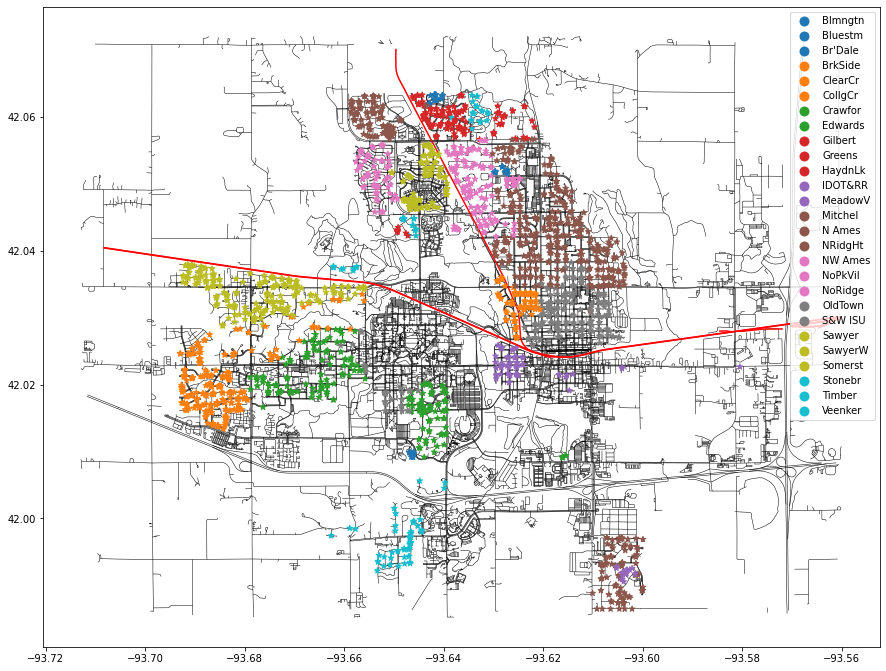

In [233]:
fig,ax = plt.subplots(figsize=(15,15))
train.plot(ax=ax, marker='*', column = 'Neighborhood_y', zorder=2, legend=True)
test.plot(ax=ax, marker='*', column = 'Neighborhood_y', zorder=2, legend=True)
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
railways.plot(ax = ax, color='red', zorder=1)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
#ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

# explore park proximity

In [234]:
npark.head()

osm_id                        name  type  \
1   44804362         Moore Memorial Park  park   
2   44806238              Brookside Park  park   
3   44806530            Ioway Creek Park  park   
4   44807182           Stuart Smith Park  park   
34  78137196  Sleepy Hollow Canoe Access  park   

                                             geometry  
1   POLYGON ((-93.64954 42.04537, -93.64954 42.045...  
2   POLYGON ((-93.63270 42.02849, -93.63212 42.028...  
3   POLYGON ((-93.62175 42.01575, -93.62203 42.015...  
4   POLYGON ((-93.63219 42.01635, -93.63173 42.016...  
34  POLYGON ((-93.62008 42.06565, -93.61995 42.065...

In [235]:
newpark = remove_empty_name(npark)

In [236]:
newpark = newpark.to_crs(4326)
ISU = ISU.to_crs(4326)

In [239]:
park_house_dist_train = newpark.geometry.apply(lambda g: train.distance(g))
park_house_dist_test = newpark.geometry.apply(lambda g: test.distance(g))

In [240]:
for i, row in train.iterrows():
    train.at[i,'nearest_park'] = park_house_dist_train[i].min()
    
for i, row in test.iterrows():
    test.at[i,'nearest_park'] = park_house_dist_test[i].min()

In [241]:
train.head()

index  Unnamed: 0   MapRefNo Neighborhood_x  GrLivArea  LotArea  LotShape  \
0      0        1736  923250210        Mitchel        988    21750         0   
1      1        1355  534177210         NWAmes       1242     9600         0   
2      2           6  528228540        Blmngtn       1246     3710         0   
3      3         900  534275010          NAmes       1050    10659         1   
4      4        1677  907290170        CollgCr        848     4435         0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0          2            5            5       1954          1954         0.0   
1          1            7            6       1973          1973       320.0   
2          1            7            5       2007          2008        20.0   
3          1            5            6       1961          1961         0.0   
4          1            6            5       2003          2003       170.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         3         3             1             1   
1          3          3         3         3             1             5   
2          4          3         4         3             4             1   
3          3          3         3         3             1             3   
4          4          3         4         3             3             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         0.0             1         0.0      988.0        988.0          5   
1       916.0             1         0.0      326.0       1242.0          2   
2         0.0             1         0.0     1146.0       1146.0          5   
3       915.0             1         0.0      135.0       1050.0          3   
4       672.0             1         0.0      176.0        848.0          5   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1       988         0             0           0.0           0.0   
1           1      1242         0             0           0.0           0.0   
2           1      1246         0             0           0.0           0.0   
3           1      1050         0             0           1.0           0.0   
4           1       848         0             0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            3             4   
1         1         1             3             1            3             6   
2         2         0             2             1            4             5   
3         1         0             3             1            3             6   
4         1         0             1             1            4             4   

   Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           8           0       1954.0             2         2.0       520.0   
1           8           1       1973.0             1         2.0       528.0   
2           8           1       2007.0             3         2.0       428.0   
3           8           0       1961.0             1         1.0       368.0   
4           8           0       2003.0             3         2.0       420.0   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0            0              0          0   
1           3           3           0            0              0          0   
2           3           3         100           24              0          0   
3           3           3           0          319              0          0   
4           3           3         140            0              0          0   

   ScreenPorch  PoolArea  MiscVal  MSSubClass_other  \
0            0         0        0                 0   
1            0         0        0                 0   
2            0         0        0           

Text(0.5, 1.0, 'sale price against distance to nearest park')

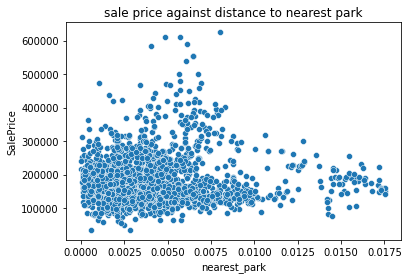

In [242]:
import seaborn as sns
x = sns.scatterplot(x=train.nearest_park, y=train.SalePrice)
x.set_title('sale price against distance to nearest park')

Quick thoughts on my work so far:

This entire notebook has been focused on using geopandas for both visualizations and feature engineering.  The features I was most excited about was 1. distance to nearest park and 2. neighborhood.  First I had to find the coordinates for each house using geocode.  This led to several errors, and about 100 houses were removed from this df because they were either missing or outside of the bounds of the map (either a null or an error).  With the remaining houses, I graphed their sale price with distance to nearest park.  The above graph shows very little impact on saleprice by park proximity.  My next venture with park proximity will be to narrow it down to proximity to particular parks, possibly only parks over a certain size.  The next concern here will be likely multicolinearity with the neighborhood feature.  Proximity to certain parks may just be another way of saying, 'is in x neighborhood'.  



# Stream proximity

In [243]:
streams = waterways[waterways['type'] == 'stream']

In [244]:
streams_train = streams.geometry.apply(lambda g: train.distance(g))
streams_train.head()

streams_test = streams.geometry.apply(lambda g: test.distance(g))
streams_test.head()

0         1         2         3         4         5         6    \
1  0.066655  0.087926  0.130080  0.087936  0.130852  0.095176  0.127819   
2  0.030859  0.058397  0.067646  0.018478  0.064977  0.045642  0.061142   
3  0.020660  0.028794  0.044278  0.046389  0.043381  0.015258  0.039789   
4  0.071159  0.049398  0.004174  0.087669  0.004267  0.038816  0.008095   
5  0.048777  0.050272  0.024407  0.050254  0.019461  0.033212  0.017147   

        7         8         9         10        11        12        13   \
1  0.085373  0.125511  0.052062  0.061416  0.053898  0.123709  0.056266   
2  0.065859  0.061948  0.047725  0.049117  0.052355  0.068800  0.038227   
3  0.036772  0.038794  0.034746  0.029029  0.035460  0.042116  0.030841   
4  0.056136  0.008586  0.082215  0.072668  0.080187  0.014123  0.080886   
5  0.059158  0.021190  0.064968  0.059757  0.066192  0.032844  0.059096   

        14        15        16        17        18        19        20   \
1  0.089690  0.113980  0.071272  0.075406  0.124369  0.075732  0.133027   
2  0.065847  0.060265  0.049756  0.060290  0.058604  0.024767  0.066316   
3  0.036272  0.032401  0.024478  0.033057  0.036510  0.013025  0.045301   
4  0.051811  0.021038  0.063210  0.062621  0.010904  0.063679  0.003606   
5  0.056289  0.031848  0.054084  0.060242  0.017884  0.039664  0.019202   

        21        22        23        24        25        26        27   \
1  0.091448  0.078177  0.107857  0.065538  0.065532  0.090660  0.064631   
2  0.020185  0.049435  0.055983  0.029116  0.050586  0.060672  0.051175   
3  0.048970  0.021606  0.027099  0.023321  0.027840  0.030746  0.028743   
4  0.088675  0.056376  0.026692  0.074041  0.068877  0.047689  0.069830   
5  0.050624  0.049383  0.031864  0.049838  0.058203  0.050455  0.059147   

        28        29        30        31        32        33        34   \
1  0.064631  0.059499  0.060889  0.068901  0.094166  0.127828  0.083191   
2  0.051175  0.039300  0.054359  0.063431  0.025648  0.062924  0.020455   
3  0.028743  0.026883  0.033028  0.038008  0.006082  0.040623  0.046431   
4  0.069830  0.075955  0.073961  0.070136  0.046847  0.006644  0.089796   
5  0.059147  0.056579  0.063531  0.066553  0.021795  0.019827  0.053218   

        35        36        37        38        39        40        41   \
1  0.067820  0.092641  0.102730  0.057008  0.108600  0.080469  0.089912   
2  0.039171  0.023590  0.051419  0.044541  0.021863  0.050806  0.025563   
3  0.019474  0.006854  0.021897  0.029877  0.026757  0.022327  0.053655   
4  0.066678  0.049133  0.031409  0.077343  0.050778  0.054367  0.094414   
5  0.050165  0.023006  0.031487  0.060237  0.011790  0.048967  0.056457   

        42        43        44        45        46        47        48   \
1  0.061460  0.068732  0.068321  0.063196  0.054856  0.054856  0.095108   
2  0.048976  0.022660  0.061696  0.033125  0.037399  0.037399  0.027818   
3  0.028914  0.026384  0.036516  0.024027  0.033725  0.033725  0.005474   
4  0.072614  0.076468  0.069806  0.074378  0.084210  0.084210  0.044893   
5  0.059645  0.048203  0.065330  0.052207  0.060655  0.060655  0.021445   

        49        50        51        52        53        54        55   \
1  0.085914  0.048317  0.101335  0.131928  0.055455  0.109800  0.074147   
2  0.022115  0.045005  0.049703  0.070510  0.044140  0.048566  0.063950   
3  0.049178  0.038577  0.020072  0.046810  0.031098  0.022766  0.037048   
4  0.091451  0.088182  0.032709  0.004026  0.079169  0.024788  0.065660   
5  0.054240  0.067036  0.031067  0.026829  0.061189  0.021533  0.064277   

        56        57        58        59        60        61        62   \
1  0.066822  0.074831  0.066937  0.120570  0.064549  0.075087  0.065422   
2  0.040539  0.058454  0.030520  0.056427  0.031118  0.053586  0.030005   
3  0.020790  0.031390  0.020465  0.033176  0.023294  0.026569  0.022800   
4  0.067498  0.062352  0.071000  0.014083  0.073879  0.060379  0.073466   
5  0.051514  0.058936  0.

In [245]:
for i, row in train.iterrows():
    train.at[i,'nearest_stream'] = streams_train[i].min()
    
for i, row in test.iterrows():
    test.at[i,'nearest_stream'] = streams_test[i].min()

Text(0.5, 1.0, 'sale price against distance to nearest stream')

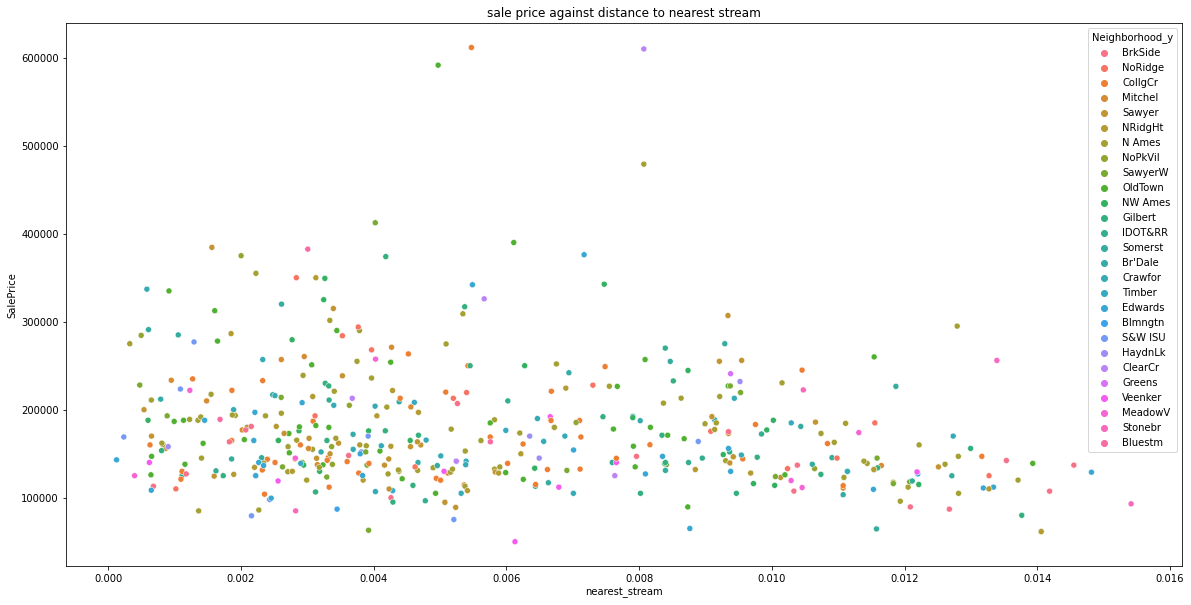

In [248]:
f, ax = plt.subplots(figsize=(20, 10))
x = sns.scatterplot(x=train.nearest_stream, y=train.SalePrice, hue=test['Neighborhood_y'])
#plt.xlim(0, .01)
x.set_title('sale price against distance to nearest stream')


# ISU proximity

In [249]:
ISU_dist_train = ISU.geometry.apply(lambda g: train.distance(g))
ISU_dist_test = ISU.geometry.apply(lambda g: test.distance(g))

ISU_dist_train

0         1         2         3         4         5         6     \
0  0.053963  0.019161  0.033245  0.024902  0.039025  0.018115  0.028353   

       7         8         9         10        11       12        13    \
0  0.045695  0.012266  0.048597  0.010582  0.039552  0.03904  0.043917   

       14        15        16        17        18        19        20    \
0  0.019604  0.035083  0.016955  0.031406  0.028415  0.022294  0.034293   

       21       22        23        24        25        26        27    \
0  0.023647  0.02712  0.058241  0.018053  0.030295  0.029209  0.031636   

       28        29        30        31        32        33       34    \
0  0.032184  0.030169  0.054805  0.043064  0.013932  0.039138  0.01611   

       35        36        37       38        39        40        41    \
0  0.025458  0.046925  0.018963  0.02747  0.021214  0.027091  0.028419   

       42        43        44        45        46        47        48    \
0  0.036317  0.020774  0.017778  0.016176  0.047954  0.047752  0.021117   

       49        50        51        52        53        54        55    \
0  0.041905  0.032024  0.030049  0.020717  0.014664  0.052623  0.018994   

       56        57        58        59        60        61        62    \
0  0.016096  0.040494  0.020064  0.028986  0.029095  0.036203  0.026707   

       63        64        65        66        67        68        69    \
0  0.038268  0.038473  0.011098  0.035246  0.026549  0.028737  0.044703   

       70        71        72        73        74        75      76    \
0  0.032655  0.052586  0.022359  0.034242  0.022417  0.033039  0.0466   

       77        78        79        80        81        82        83    \
0  0.030661  0.018509  0.029075  0.022303  0.025639  0.016788  0.020907   

      84        85        86        87       88       89        90    \
0  0.04006  0.016969  0.047955  0.029891  0.03844  0.01798  0.038644   

       91        92        93        94       95        96       97    \
0  0.033026  0.027551  0.034584  0.032449  0.03244  0.034248  0.03832   

       98        99        100       101      102      103       104   \
0  0.030709  0.030855  0.046819  0.021764  0.02327  0.02951  0.018714   

       105       106       107       108       109       110      111   \
0  0.033312  0.041892  0.034005  0.056267  0.024902  0.030956  0.03089   

       112       113       114       115       116       117       118   \
0  0.027081  0.053451  0.015761  0.025384  0.029224  0.029041  0.020459   

       119       120       121       122       123       124       125   \
0  0.045656  0.046405  0.021514  0.013496  0.037103  0.033884  0.040495   

       126       127       128       129       130       131       132   \
0  0.023095  0.024572  0.021188  0.029525  0.025841  0.025841  0.023013   

       133       134       135      136       137     138       139   \
0  0.010304  0.036552  0.034704  0.02812  0.031716  0.0161  0.039821   

       140       141      142      143       144       145       146   \
0  0.041737  0.041737  0.01953  0.04363  0.011764  0.016104  0.020636   

       147       148       149       150       151       152       153   \
0  0.044687  0.015362  0.039752  0.019277  0.024343  0.027902  0.027798   

       154       155       156       157       158      159       160   \
0  0.027539  0.035773  0.030424  0.056845  0.029617  0.03394  0.033685   

       161       162       163       164       165       166       167   \
0  0.034782  0.026271  0.013452  0.020319  0.026251  0.031232  0.034309   

       168      169      170       171       172       173       174   \
0  0.016554  0.01887  0.01887  0.028735  0.028997  0.014651  0.026217   

       175       176       177       178       179       180       181   \
0  0.034294  0.017176  0.022401  0.013988  0.020121  0.028293  0.025093   

      182       183      184       185       186       187       188   \
0  0.03586  0.013967  0.04897  0.048968  0.032698  0

In [250]:
for i, row in train.iterrows():
    train.at[i,'ISU_distance'] = ISU_dist_train[i].min()
    
for i, row in test.iterrows():
    test.at[i,'ISU_distance'] = ISU_dist_test[i].min()

In [251]:
train.head()

index  Unnamed: 0   MapRefNo Neighborhood_x  GrLivArea  LotArea  LotShape  \
0      0        1736  923250210        Mitchel        988    21750         0   
1      1        1355  534177210         NWAmes       1242     9600         0   
2      2           6  528228540        Blmngtn       1246     3710         0   
3      3         900  534275010          NAmes       1050    10659         1   
4      4        1677  907290170        CollgCr        848     4435         0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0          2            5            5       1954          1954         0.0   
1          1            7            6       1973          1973       320.0   
2          1            7            5       2007          2008        20.0   
3          1            5            6       1961          1961         0.0   
4          1            6            5       2003          2003       170.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         3         3             1             1   
1          3          3         3         3             1             5   
2          4          3         4         3             4             1   
3          3          3         3         3             1             3   
4          4          3         4         3             3             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         0.0             1         0.0      988.0        988.0          5   
1       916.0             1         0.0      326.0       1242.0          2   
2         0.0             1         0.0     1146.0       1146.0          5   
3       915.0             1         0.0      135.0       1050.0          3   
4       672.0             1         0.0      176.0        848.0          5   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1       988         0             0           0.0           0.0   
1           1      1242         0             0           0.0           0.0   
2           1      1246         0             0           0.0           0.0   
3           1      1050         0             0           1.0           0.0   
4           1       848         0             0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            3             4   
1         1         1             3             1            3             6   
2         2         0             2             1            4             5   
3         1         0             3             1            3             6   
4         1         0             1             1            4             4   

   Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           8           0       1954.0             2         2.0       520.0   
1           8           1       1973.0             1         2.0       528.0   
2           8           1       2007.0             3         2.0       428.0   
3           8           0       1961.0             1         1.0       368.0   
4           8           0       2003.0             3         2.0       420.0   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0            0              0          0   
1           3           3           0            0              0          0   
2           3           3         100           24              0          0   
3           3           3           0          319              0          0   
4           3           3         140            0              0          0   

   ScreenPorch  PoolArea  MiscVal  MSSubClass_other  \
0            0         0        0                 0   
1            0         0        0                 0   
2            0         0        0           

Text(0.5, 1.0, 'sale price against distance to ISU')

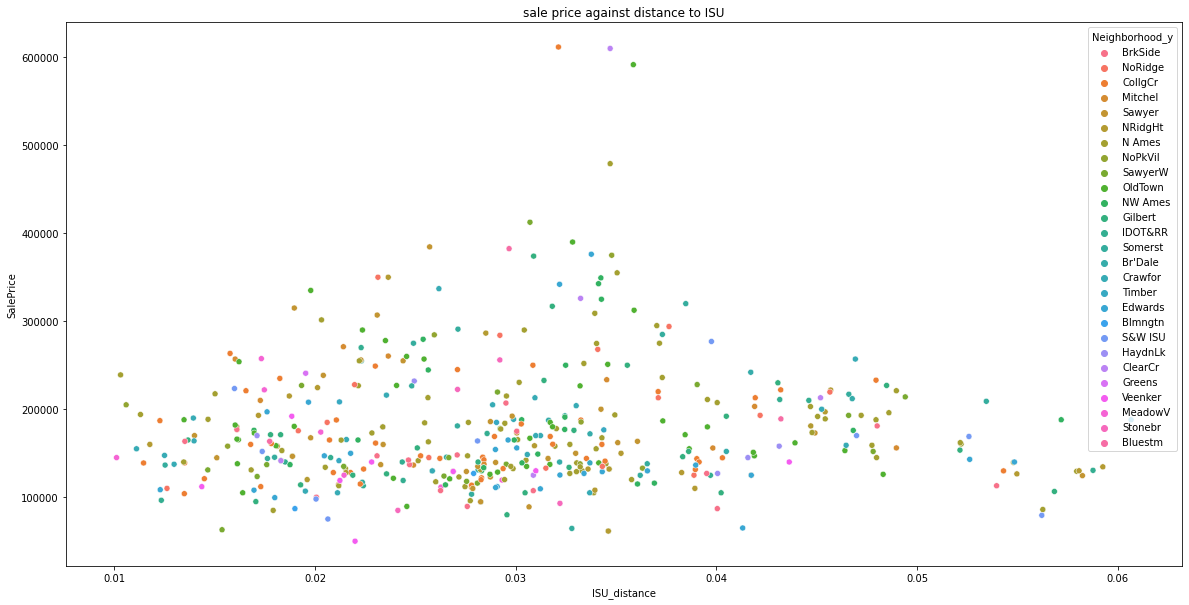

In [252]:
f, ax = plt.subplots(figsize=(20, 10))
x = sns.scatterplot(x=train.ISU_distance, y=train.SalePrice, hue=test['Neighborhood_y'])
x.set_title('sale price against distance to ISU')


Text(0.5, 1.0, 'sale price against longitude')

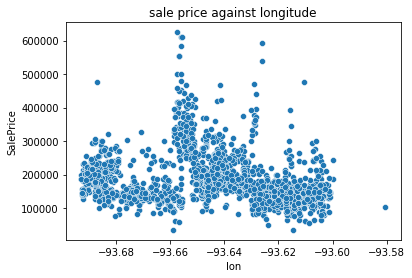

In [253]:
x = sns.scatterplot(x=train.lon, y=train.SalePrice)
x.set_title('sale price against longitude')

Text(0.5, 1.0, 'sale price against latitude')

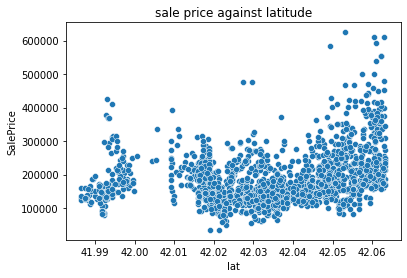

In [254]:
x = sns.scatterplot(x=train.lat, y=train.SalePrice)
x.set_title('sale price against latitude')

# limit search to only large parks

In [255]:
newpark["area"] = newpark['geometry'].area
newpark.sort_values('area', ascending=False)
largepark = newpark.sort_values('area', ascending=False).head(5)
largepark

osm_id                      name  type  \
2     44806238            Brookside Park  park   
4     44807182         Stuart Smith Park  park   
413  921759082  Izaak Walton League Park  park   
1     44804362       Moore Memorial Park  park   
65   188427943   North River Valley Park  park   

                                              geometry      area  
2    POLYGON ((-93.63270 42.02849, -93.63212 42.028...  0.000042  
4    POLYGON ((-93.63219 42.01635, -93.63173 42.016...  0.000038  
413  POLYGON ((-93.59520 42.04553, -93.58620 42.045...  0.000033  
1    POLYGON ((-93.64954 42.04537, -93.64954 42.045...  0.000022  
65   POLYGON ((-93.59717 42.03713, -93.59710 42.037...  0.000021

In [256]:
large_park_house_dist_train = largepark.geometry.apply(lambda g: train.distance(g))
large_park_house_dist_test = largepark.geometry.apply(lambda g: test.distance(g))


In [257]:
for i, row in train.iterrows():
    train.at[i,'nearest_large_park'] = large_park_house_dist_train[i].min()
    
for i, row in test.iterrows():
    test.at[i,'nearest_large_park'] = large_park_house_dist_test[i].min()

In [258]:
train.head()

index  Unnamed: 0   MapRefNo Neighborhood_x  GrLivArea  LotArea  LotShape  \
0      0        1736  923250210        Mitchel        988    21750         0   
1      1        1355  534177210         NWAmes       1242     9600         0   
2      2           6  528228540        Blmngtn       1246     3710         0   
3      3         900  534275010          NAmes       1050    10659         1   
4      4        1677  907290170        CollgCr        848     4435         0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0          2            5            5       1954          1954         0.0   
1          1            7            6       1973          1973       320.0   
2          1            7            5       2007          2008        20.0   
3          1            5            6       1961          1961         0.0   
4          1            6            5       2003          2003       170.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         3         3             1             1   
1          3          3         3         3             1             5   
2          4          3         4         3             4             1   
3          3          3         3         3             1             3   
4          4          3         4         3             3             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         0.0             1         0.0      988.0        988.0          5   
1       916.0             1         0.0      326.0       1242.0          2   
2         0.0             1         0.0     1146.0       1146.0          5   
3       915.0             1         0.0      135.0       1050.0          3   
4       672.0             1         0.0      176.0        848.0          5   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1       988         0             0           0.0           0.0   
1           1      1242         0             0           0.0           0.0   
2           1      1246         0             0           0.0           0.0   
3           1      1050         0             0           1.0           0.0   
4           1       848         0             0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            3             4   
1         1         1             3             1            3             6   
2         2         0             2             1            4             5   
3         1         0             3             1            3             6   
4         1         0             1             1            4             4   

   Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           8           0       1954.0             2         2.0       520.0   
1           8           1       1973.0             1         2.0       528.0   
2           8           1       2007.0             3         2.0       428.0   
3           8           0       1961.0             1         1.0       368.0   
4           8           0       2003.0             3         2.0       420.0   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0            0              0          0   
1           3           3           0            0              0          0   
2           3           3         100           24              0          0   
3           3           3           0          319              0          0   
4           3           3         140            0              0          0   

   ScreenPorch  PoolArea  MiscVal  MSSubClass_other  \
0            0         0        0                 0   
1            0         0        0                 0   
2            0         0        0           

Text(0.5, 1.0, 'sale price against distance to nearest large park')

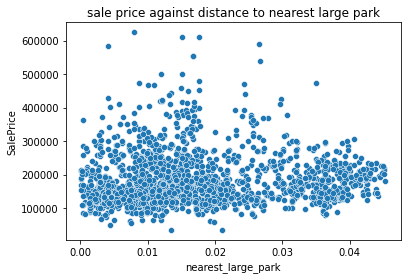

In [259]:
x = sns.scatterplot(train.nearest_large_park, train.SalePrice)
x.set_title('sale price against distance to nearest large park')

# explore by neighborhood

In [260]:
# define neighborhoods
ontario = places[places['name'] == 'Ontario']
somerset = places[places['name'] == 'Somerset']
frederiksen = places[places['name'] == 'Frederiksen Court']
uniondrive = places[places['name'] == 'Union Drive']
richardson = places[places['name'] == 'Richardson Court']

<AxesSubplot:>

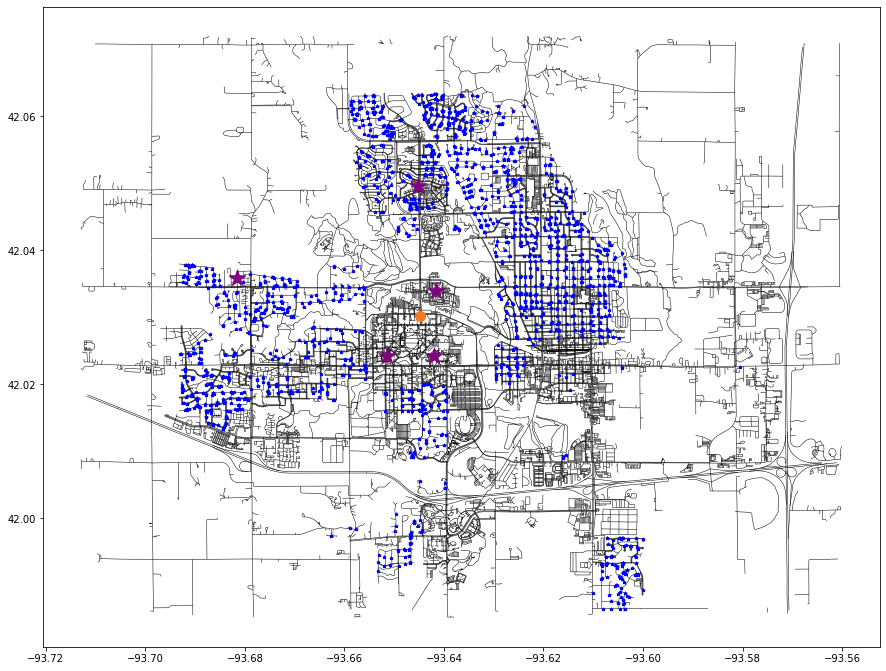

In [261]:
# first trying with coloring by neighborhood
fig,ax = plt.subplots(figsize=(15,12))
train.plot(ax=ax, marker='*', zorder=2, legend=True, color='blue', markersize=10)
ontario.plot(ax=ax, marker='*', zorder=2, legend=True, color='purple', markersize=300)
somerset.plot(ax=ax, marker='*', zorder=2, legend=True, color='purple', markersize=300)
frederiksen.plot(ax=ax, marker='*', zorder=2, legend=True, color='purple', markersize=300)
uniondrive.plot(ax=ax, marker='*', zorder=2, legend=True, color='purple', markersize=300)
richardson.plot(ax=ax, marker='*', zorder=2, legend=True, color='purple', markersize=300)
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
#railways.plot(ax = ax, color='red', zorder=1)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

# explore by yearbuilt

Text(0.5, 0.98, 'Colored by Year built')

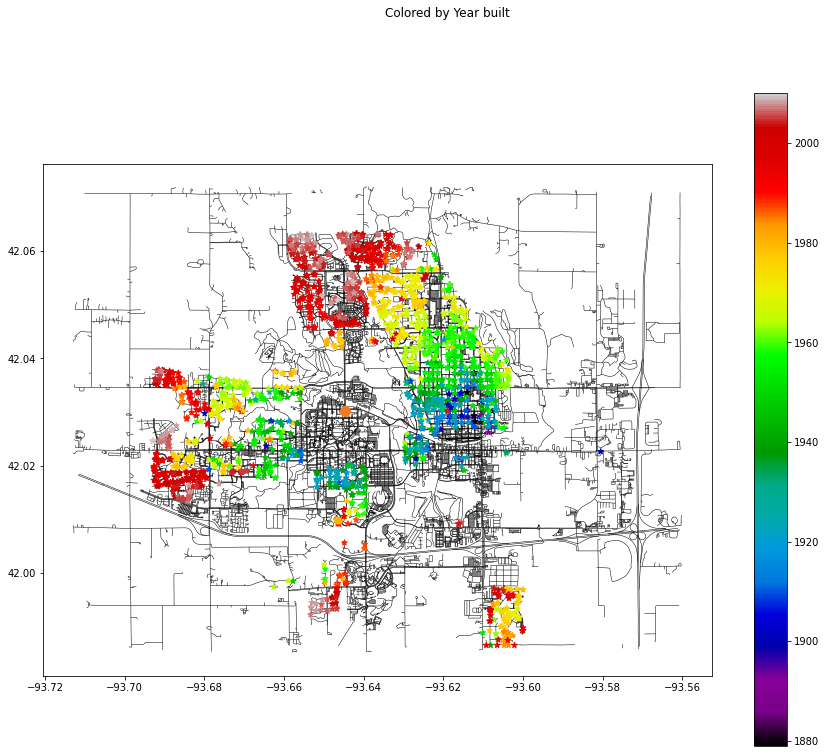

In [263]:
# first trying with coloring by neighborhood
fig,ax = plt.subplots(figsize=(15,12))
train.plot(ax=ax, marker='*', zorder=2, column='YearBuilt', legend=True, cmap="nipy_spectral")
test.plot(ax=ax, marker='*', zorder=2, column='YearBuilt', cmap="nipy_spectral")
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
#railways.plot(ax = ax, color='red', zorder=1)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)
pl.suptitle("Colored by Year built")


# explore by everything

In [264]:
columns = list(train.columns)
columns

['index',
 'Unnamed: 0',
 'MapRefNo',
 'Neighborhood_x',
 'GrLivArea',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MSSubClass_other',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'M

In [265]:
columns.remove('Address')
columns.remove('MapRefNo')
columns.remove('Unnamed: 0')
columns.remove('address')

In [33]:
for i in columns:
    fig,ax = plt.subplots(figsize=(15,12))
    train.plot(ax=ax, marker='*', zorder=2, column=i, legend=True, cmap="nipy_spectral")
    test.plot(ax=ax, marker='*', zorder=2, column=i, cmap="nipy_spectral")
    roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
    pl.suptitle("Colored by " + i)
    
IPython.OutputArea.auto_scroll_threshold = 9999;

In [266]:
# create neighborhood dataframe organized by mean saleprice 
# this is redundant and done again later, probably delete this
neighborhood_df = train[['MapRefNo', 'Neighborhood_y', 'YearBuilt', 'TotalSF', 'Price/SF']].groupby('Neighborhood_y').median()
neighborhood_df.head() 

MapRefNo  YearBuilt  TotalSF   Price/SF
Neighborhood_y                                            
Blmngtn         528228430.0     2005.0   2850.0  73.256319
Bluestm         909451150.0     1980.0   2016.0  76.536313
Br'Dale         527451140.0     1972.0   1617.0  63.359788
BrkSide         903228070.0     1930.0   2066.0  62.697576
ClearCr         905352105.0     1968.0   3037.5  74.705592

In [267]:
# group by neighborhood to get count and median_price of each neighborhood
neighborhood_df1 = train.groupby('Neighborhood_y').agg({'MapRefNo':'count', 'SalePrice':'median'}).rename(columns={'MapRefNo':'neighborhood_count', 'SalePrice':'neighborhood_median_price'}).reset_index().sort_values(by='neighborhood_median_price', ascending=False)
neighborhood_df1

Neighborhood_y  neighborhood_count  neighborhood_median_price
10        HaydnLk                  16                   367209.5
15        NRidgHt                 100                   307500.0
18        NoRidge                  52                   301750.0
26        Veenker                  15                   255000.0
4         ClearCr                  32                   227500.0
23        Somerst                 117                   227000.0
25         Timber                  45                   220000.0
24        Stonebr                  20                   212750.0
5         CollgCr                 188                   199450.0
6         Crawfor                  73                   194000.0
0         Blmngtn                  21                   191000.0
9          Greens                   7                   190000.0
22        SawyerW                  84                   189000.0
8         Gilbert                 114                   183350.0
16        NW Ames                 102                   181450.0
13        Mitchel                  81                   157000.0
1         Bluestm                   7                   151000.0
17        NoPkVil                  16                   145000.0
14         N Ames                 310                   141750.0
20        S&W ISU                  25                   137000.0
21         Sawyer                  99                   137000.0
7         Edwards                  99                   130000.0
3         BrkSide                  73                   128500.0
19        OldTown                 139                   124500.0
11        IDOT&RR                  45                   116000.0
2         Br'Dale                  24                   107000.0
12        MeadowV                  20                    92950.0

In [268]:
neighborhood_medians = pd.merge(neighborhood_df, neighborhood_df1, on='Neighborhood_y').rename(columns={'Price/SF': 'neighborhood_Price/SF', 'TotalSF': 'neighborhood_TotalSF', 'YearBuilt': 'neighborhood_YearBuilt'}).sort_values(by='neighborhood_median_price', ascending=False)
neighborhood_medians = neighborhood_medians.drop(columns='MapRefNo')
neighborhood_medians

Neighborhood_y  neighborhood_YearBuilt  neighborhood_TotalSF  \
10        HaydnLk                  2005.5                3701.0   
15        NRidgHt                  2005.0                3493.0   
18        NoRidge                  1995.5                3761.0   
26        Veenker                  1980.0                2988.0   
4         ClearCr                  1968.0                3037.5   
23        Somerst                  2005.0                2782.0   
25         Timber                  2001.0                3002.0   
24        Stonebr                  1992.0                2910.5   
5         CollgCr                  2001.0                2605.0   
6         Crawfor                  1940.0                2618.0   
0         Blmngtn                  2005.0                2850.0   
9          Greens                  1980.0                2452.0   
22        SawyerW                  1993.0                2586.5   
8         Gilbert                  1999.0                2446.0   
16        NW Ames                  1976.0                2789.5   
13        Mitchel                  1978.0                2376.0   
1         Bluestm                  1980.0                2016.0   
17        NoPkVil                  1976.0                2244.0   
14         N Ames                  1960.0                2260.0   
20        S&W ISU                  1928.0                2457.0   
21         Sawyer                  1965.0                2000.0   
7         Edwards                  1955.0                2241.0   
3         BrkSide                  1930.0                2066.0   
19        OldTown                  1920.0                2198.0   
11        IDOT&RR                  1930.0                1935.0   
2         Br'Dale                  1972.0                1617.0   
12        MeadowV                  1973.0                1638.0   

    neighborhood_Price/SF  neighborhood_count  neighborhood_median_price  
10              97.923281                  16                   367209.5  
15              88.295123                 100                   307500.0  
18              83.705928                  52                   301750.0  
26              75.231948                  15                   255000.0  
4               74.705592                  32                   227500.0  
23              82.036316                 117                   227000.0  
25              79.269642                  45                   220000.0  
24              74.446576                  20                   212750.0  
5               75.947028                 188                   199450.0  
6               73.979592                  73                   194000.0  
0               73.256319                  21                   191000.0  
9               86.256117                   7                   190000.0  
22              71.421366                  84                   189000.0  
8               76.106288                 114                   183350.0  
16              67.179057                 102                   181450.0  
13              71.605960                  81                   157000.0  
1               76.536313                   7                   151000.0  
17              64.560796                  16                   145000.0  
14              64.596828                 310                   141750.0  
20              55.226824                  25                   137000.0  
21              67.805123                  99                   137000.0  
7               58.035714                  99                   130000.0  
3               62.697576                  73                   128500.0  
19              58.260508                 139                   124500.0  
11              58.021267                  45                   116000.0  
2               63.359788                  24                   107000.0  
12              59.142193                  20                    92950.0

<AxesSubplot:xlabel='neighborhood_median_price', ylabel='Neighborhood_y'>

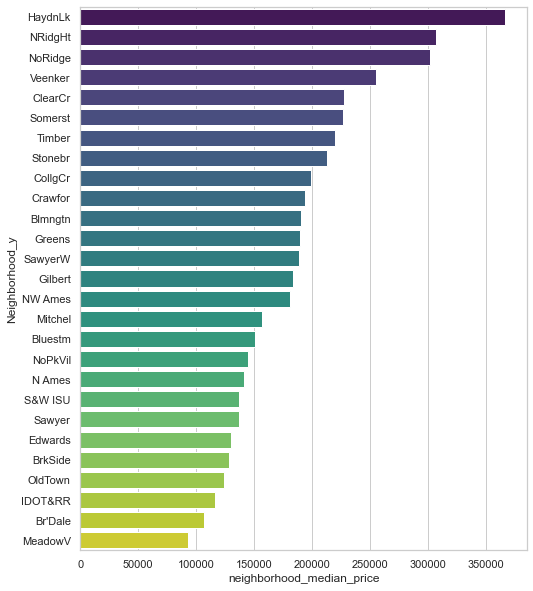

In [269]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 10))
sns.barplot(data=neighborhood_medians, x='neighborhood_median_price', y='Neighborhood_y', orient='h', palette='viridis')

In [270]:
# merge neighborhood dataframe back on to the houses dataframe to assign the median household price 
# of the neighborhood to each house in the neighborhood
trainnew = pd.merge(train, neighborhood_medians, on='Neighborhood_y')
testnew = pd.merge(test, neighborhood_medians, on='Neighborhood_y')
testnew.head()

index  Unnamed: 0   MapRefNo Neighborhood_x  GrLivArea  LotArea  LotShape  \
0      0         898  903233100        BrkSide       1576     6240         0   
1     60        1988  903236010        BrkSide       1285     8635         0   
2    107         465  903235020        BrkSide        616     6000         0   
3    116         703  903228120        BrkSide        904     6000         0   
4    142        2070  903227150        BrkSide       1453     6360         0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0          1            5            6       1928          1950         0.0   
1          1            5            5       1948          2001         0.0   
2          1            5            7       1921          1950         0.0   
3          1            6            7       1926          2004         0.0   
4          1            5            6       1942          1950       300.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         3         3             1             1   
1          3          3         3         3             1             4   
2          3          3         3         3             1             2   
3          4          3         3         3             1             1   
4          3          3         3         3             1             3   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         0.0             1         0.0     1042.0       1042.0          5   
1       336.0             6        41.0      295.0        672.0          3   
2       616.0             1         0.0        0.0        616.0          4   
3         0.0             1         0.0      884.0        884.0          4   
4       360.0             2       159.0      316.0        835.0          3   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1      1042       534             0           0.0           0.0   
1           1      1072       213             0           1.0           0.0   
2           1       616         0             0           0.0           0.0   
3           1       904         0             0           0.0           0.0   
4           1       955       498             0           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             3             1            3             8   
1         1         0             2             1            3             6   
2         1         0             2             1            3             4   
3         1         0             2             1            3             4   
4         1         1             3             1            4             7   

   Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           8           1       1928.0             1         1.0       225.0   
1           7           0       1948.0             1         1.0       240.0   
2           8           0       1921.0             1         1.0       205.0   
3           8           0       1926.0             1         1.0       180.0   
4           6           2       1942.0             1         1.0       240.0   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0            0              0          0   
1           3           3           0            0              0          0   
2           3           3           0            0            129          0   
3           3           3           0            0            105          0   
4           3           3           0            0             35          0   

   ScreenPorch  PoolArea  MiscVal  MSSubClass_other  \
0            0         0        0                 0   
1            0         0        0                 0   
2            0         0        0           

In [271]:
# reverse colomap for consistency
orig_map=plt.cm.get_cmap('viridis')
reversed_map = orig_map.reversed()

<AxesSubplot:>

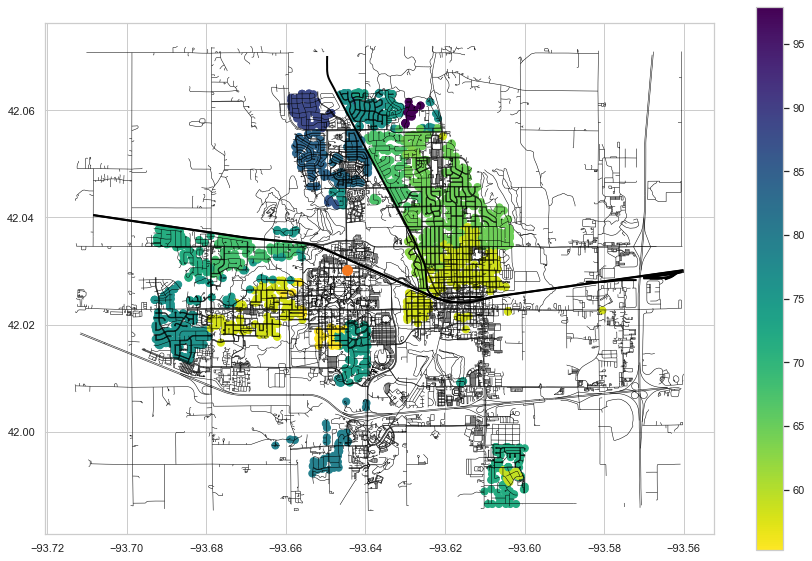

In [275]:
# coloring neighborhood by median neighborhood $/SF
fig,ax = plt.subplots(figsize=(15,10))
#dfnew.plot(ax=ax, marker='*', zorder=2, column='mean_price', colorbar=True)
trainnew.plot(column='neighborhood_Price/SF', ax=ax, legend=True, markersize=50, cmap=reversed_map)
testnew.plot(column='neighborhood_Price/SF', ax=ax, markersize=50, cmap=reversed_map)
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
railways.plot(ax = ax, color='black', zorder=1, linewidth=2)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

<AxesSubplot:>

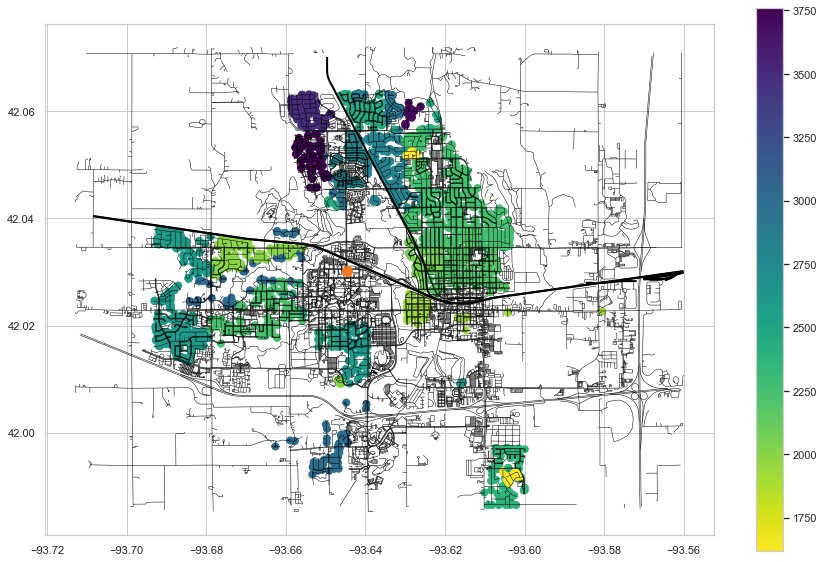

In [274]:
# coloring neighborhood by median neighborhood SF
fig,ax = plt.subplots(figsize=(15,10))
#dfnew.plot(ax=ax, marker='*', zorder=2, column='mean_price', colorbar=True)
trainnew.plot(column='neighborhood_TotalSF', ax=ax, legend=True, markersize=50, cmap=reversed_map)
testnew.plot(column='neighborhood_TotalSF', ax=ax, markersize=50, cmap=reversed_map)
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
railways.plot(ax = ax, color='black', zorder=1, linewidth=2)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

# add new neighborhood features

In [276]:

trainnew['TotalSf-NSF'] = trainnew['TotalSF'] - trainnew['neighborhood_TotalSF']
trainnew['Price/SF-NPrice/SF'] = trainnew['Price/SF'] - trainnew['neighborhood_Price/SF']
trainnew['SalePrice-NMedPrice'] = trainnew['SalePrice'] - trainnew['neighborhood_median_price']
trainnew['YearBuilt-NYearBuilt'] = trainnew['YearBuilt'] - trainnew['neighborhood_YearBuilt']

testnew['TotalSf-NSF'] = testnew['TotalSF'] - testnew['neighborhood_TotalSF']
testnew['Price/SF-NPrice/SF'] = testnew['Price/SF'] - testnew['neighborhood_Price/SF']
testnew['SalePrice-NMedPrice'] = testnew['SalePrice'] - testnew['neighborhood_median_price']
testnew['YearBuilt-NYearBuilt'] = testnew['YearBuilt'] - testnew['neighborhood_YearBuilt']

# Write new dataframes to CSV for my dude, Robert

In [277]:
geoTRAIN = trainnew.copy()
geoTEST = testnew.copy()

In [278]:
geoTRAIN.to_csv('../Data_Master/geoTRAIN.csv')
geoTEST.to_csv('../Data_Master/geoTEST.csv')

## Questions for Luke


Project Goal:
__Perform a descriptive analysis of the Ames housing market with an emphasis on location. Used for buyers to assess realistic expectations of price for the features they want.__


1. help us clarify our goal for the project


2. multicolinearity (square footage/# of rooms - proximity to certain features/neighborhood)


3. handling null values and zeroes


4. within group analysis: validity of clustering houses into groups then running regressions within groups
        
        a. cluster based on median price brackets, neighborhoods, kmeans??

5. clever ways of assessing proximities as a feature

## Responses

1.


2. Log transform the y.  Lasso for feature selection. 

handling yr features, log


3. zeroes: use lasso for feature selection rather than splitting data into multiple gruops.

null: knn imputation (use similar variables to predict null value) or mean imputation


4. include proximity against price per square foot

census data for median income by neighborhood.  Use this to group neighborhoods.  Or use kmeans for clustering.  

Dummify neighborhood than use this to predict saleprice with lasso

what features differentiate the neighborhood/groups


5.cluster by kmeans including coordinates

maybe focus on two features, 


# implementing decision trees on coordinates for neighborhood grouping

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='lon', y='lat', hue='SalePrice_x')

In [ ]:
import matplotlib.pyplot as plt
from PlotFunctions import plot_model
from sklearn.metrics import confusion_matrix
from collections import Counter
import math

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

def purity(L, metric='gini'):
    total = len(L)
    freq = map(lambda x: float(x) / total, list(Counter(L).values()))
    if metric == 'gini':
        scores = map(lambda x: x * (1 - x), freq)
    elif metric == 'entropy':
        scores = map(lambda x: -x * math.log(x, 2), freq)
    return sum(scores)

In [ ]:
test = df.head(50)

In [ ]:
# create a price bin for grouping houses by saleprice
test['priceBin'] = pd.cut(test.SalePrice_x, 8, labels=False)
test

In [ ]:
tree_model.fit(test.loc[1][:, -5:-6], test.loc[1].priceBin)

In [ ]:
test.loc[1][:]

# Kmeans a good time

In [305]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [306]:
merged = pd.concat([train, test])

In [307]:
merged.head()

Unnamed: 0   MapRefNo Neighborhood_x  GrLivArea  LotArea  LotShape  \
0        1736  923250210        Mitchel        988    21750         0   
1        1355  534177210         NWAmes       1242     9600         0   
2           6  528228540        Blmngtn       1246     3710         0   
3         900  534275010          NAmes       1050    10659         1   
4        1677  907290170        CollgCr        848     4435         0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0          2            5            5       1954          1954         0.0   
1          1            7            6       1973          1973       320.0   
2          1            7            5       2007          2008        20.0   
3          1            5            6       1961          1961         0.0   
4          1            6            5       2003          2003       170.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         3         3             1             1   
1          3          3         3         3             1             5   
2          4          3         4         3             4             1   
3          3          3         3         3             1             3   
4          4          3         4         3             3             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         0.0             1         0.0      988.0        988.0          5   
1       916.0             1         0.0      326.0       1242.0          2   
2         0.0             1         0.0     1146.0       1146.0          5   
3       915.0             1         0.0      135.0       1050.0          3   
4       672.0             1         0.0      176.0        848.0          5   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1       988         0             0           0.0           0.0   
1           1      1242         0             0           0.0           0.0   
2           1      1246         0             0           0.0           0.0   
3           1      1050         0             0           1.0           0.0   
4           1       848         0             0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            3             4   
1         1         1             3             1            3             6   
2         2         0             2             1            4             5   
3         1         0             3             1            3             6   
4         1         0             1             1            4             4   

   Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           8           0       1954.0             2         2.0       520.0   
1           8           1       1973.0             1         2.0       528.0   
2           8           1       2007.0             3         2.0       428.0   
3           8           0       1961.0             1         1.0       368.0   
4           8           0       2003.0             3         2.0       420.0   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0            0              0          0   
1           3           3           0            0              0          0   
2           3           3         100           24              0          0   
3           3           3           0          319              0          0   
4           3           3         140            0              0          0   

   ScreenPorch  PoolArea  MiscVal  MSSubClass_other  \
0            0         0        0                 0   
1            0         0        0                 0   
2            0         0        0                 0   
3            0         0       

In [308]:
X = merged.loc[:, ["MapRefNo", "lon", "lat", "SalePrice"]]

In [309]:
X

MapRefNo        lon        lat  SalePrice
0    923250210 -93.610074  41.988843     113000
1    534177210 -93.631309  42.043849     175500
2    528228540 -93.641569  42.063284     187687
3    534275010 -93.623531  42.043228     136500
4    907290170 -93.681211  42.016284     143750
..         ...        ...        ...        ...
477  528172020 -93.643538  42.061667     275000
478  535352090 -93.616032  42.037115     113000
479  527378010 -93.631414  42.049600     155000
480  923275080 -93.604709  41.988993     142500
481  534400060 -93.629671  42.040586     180500

[2347 rows x 4 columns]

In [310]:
# standardize data
scaler = StandardScaler()

X[['lon', 'lat', 'SalePrice']] = scaler.fit_transform(X[['lon', 'lat', 'SalePrice']])

X.head()
# just double checking

MapRefNo       lon       lat  SalePrice
0  923250210  1.264481 -2.537627  -0.925595
1  534177210  0.444724  0.484868  -0.100521
2  528228540  0.048667  1.552788   0.060362
3  534275010  0.744984  0.450736  -0.615367
4  907290170 -1.481678 -1.029792  -0.519659

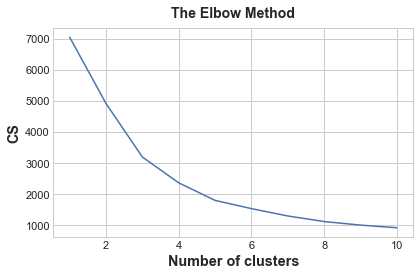

In [311]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X[['lon', 'lat', 'SalePrice']])
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [312]:
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X[['lon', 'lat', 'SalePrice']])
X["Cluster"] = X["Cluster"].astype("category")

X.head()

MapRefNo       lon       lat  SalePrice Cluster
0  923250210  1.264481 -2.537627  -0.925595       2
1  534177210  0.444724  0.484868  -0.100521       1
2  528228540  0.048667  1.552788   0.060362       1
3  534275010  0.744984  0.450736  -0.615367       3
4  907290170 -1.481678 -1.029792  -0.519659       0

In [313]:
merged = merged.merge(X[['MapRefNo', 'Cluster']], on='MapRefNo')

In [314]:
merged.columns

Index(['Unnamed: 0', 'MapRefNo', 'Neighborhood_x', 'GrLivArea', 'LotArea',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'Address', 'geometry', 'address', 'lon', 'lat', 'nearest_park',
       'nearest_stream', 'ISU_distance', 'nearest_large_park', 'Cluster'],
      dtype='object', length=185)

<AxesSubplot:>

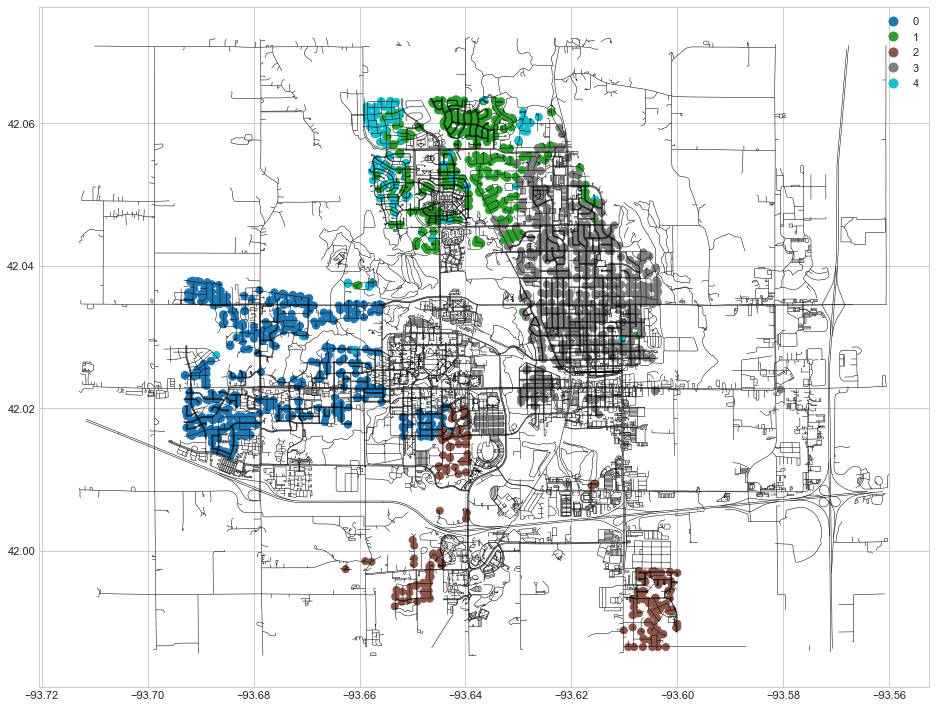

In [315]:
# coloring neighborhood by median neighborhood house price
fig,ax = plt.subplots(figsize=(15,10))
merged.plot(ax=ax, legend=True, markersize=50, column='Cluster')
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)

In [316]:
import plotly.express as px

fig = px.box(merged, x='Cluster', y='LogSalePrice')
fig.show()

In [317]:
cluster0 = merged[merged['Cluster'] == 0]
cluster1 = merged[merged['Cluster'] == 1]
cluster2 = merged[merged['Cluster'] == 2]
cluster3 = merged[merged['Cluster'] == 3]
cluster4 = merged[merged['Cluster'] == 4]

In [318]:
cluster0 = pd.DataFrame(cluster0.mean())
cluster1 = pd.DataFrame(cluster1.mean())
cluster2 = pd.DataFrame(cluster2.mean())
cluster3 = pd.DataFrame(cluster3.mean())
cluster4 = pd.DataFrame(cluster4.mean())

In [344]:
cluster0.loc['SalePrice']

0    170295.248915
Name: SalePrice, dtype: float64

In [345]:
clusters = pd.merge(cluster0, cluster1, left_index=True, right_index=True).rename(columns={'0_x':'0', '0_y':1})
clusters = pd.merge(clusters, cluster2, left_index=True, right_index=True).rename(columns={0:'2'})
clusters = pd.merge(clusters, cluster3, left_index=True, right_index=True).rename(columns={0:'3'})
clusters = pd.merge(clusters, cluster4, left_index=True, right_index=True).rename(columns={0:'4'})
clusters

0_x  \
Unnamed: 0          1.205779e+03   
MapRefNo            8.433600e+08   
GrLivArea           1.417217e+03   
LotArea             1.075977e+04   
LotShape            4.327062e-01   
...                          ...   
lat                 4.202507e+01   
nearest_park        6.149751e-03   
nearest_stream      3.124380e-03   
ISU_distance        3.330295e-02   
nearest_large_park  2.882440e-02   

                    0    207406.910747\nName: SalePrice, dtype: float64  \
Unnamed: 0                                               1.185936e+03     
MapRefNo                                                 5.305974e+08     
GrLivArea                                                1.637419e+03     
LotArea                                                  9.491621e+03     
LotShape                                                 5.919854e-01     
...                                                               ...     
lat                                                      4.205417e+01     
nearest_park                                             2.904949e-03     
nearest_stream                                           7.003344e-03     
ISU_distance                                             2.569808e-02     
nearest_large_park                                       1.335138e-02     

                               2             3             4  
Unnamed: 0          1.200300e+03  1.219787e+03  1.000082e+03  
MapRefNo            9.169585e+08  6.789361e+08  5.404847e+08  
GrLivArea           1.485973e+03  1.293706e+03  2.341747e+03  
LotArea             1.228597e+04  8.574262e+03  1.398971e+04  
LotShape            4.692308e-01  1.829733e-01  6.518987e-01  
...                          ...           ...           ...  
lat                 4.199979e+01  4.203737e+01  4.205573e+01  
nearest_park        3.219082e-03  4.329008e-03  5.207859e-03  
nearest_stream      2.582738e-03  8.696483e-03  4.803017e-03  
ISU_distance        3.992668e-02  2.800579e-02  2.888207e-02  
nearest_large_park  2.627949e-02  9.287207e-03  1.400094e-02  

[178 rows x 5 columns]